In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
BASE_DIR = "newdata/data_excel_finalmatrix_modified/"

In [4]:
def readfile(filename):
    return pd.read_excel(BASE_DIR + filename)

In [5]:
def filter_data(data):
    filtered_data = np.array(data)
    fil_data = []
    for x in filtered_data:
        if x[1] != 0:
            fil_data.append((x[1],x[-1]))
    filtered_data = np.array(fil_data)
    return filtered_data

In [16]:
def plot_data(data,saveplace=None,ylim_min=None):
    plt.figure(figsize=(20,12))
    plt.scatter(data[:,1],data[:,0])
    if ylim_min is None:
        plt.ylim(60,0)
    else:
        plt.ylim(60,ylim_min)
    if saveplace is not None:
        plt.savefig(saveplace)
    plt.show()

In [ ]:
plot_data(filter_data(readfile("shashi5.xlsx")))

In [8]:
GAUSSIAN_KERNELS = {5 : [np.array([5,15,60,15,5])/100]}

In [9]:
def apply_filter(data,kernel,kernel_len):
    pd = int(kernel_len/2)
    ln = len(data)
    newdata = []
    for i in range(pd):
        newdata.append(data[i])
    for i in range(pd,ln - pd):
        val = np.sum(data[i-pd:i+pd+1,0]*kernel)
        newdata.append((val,data[i,1]))
    for i in range(ln-pd,ln) :
        newdata.append(data[i])
    return np.array(newdata)

In [22]:
data = readfile("Achal_37_fm.xlsx")

In [23]:
data = filter_data(data)

In [24]:
filtered_data = apply_filter(data,GAUSSIAN_KERNELS[5][0],5)

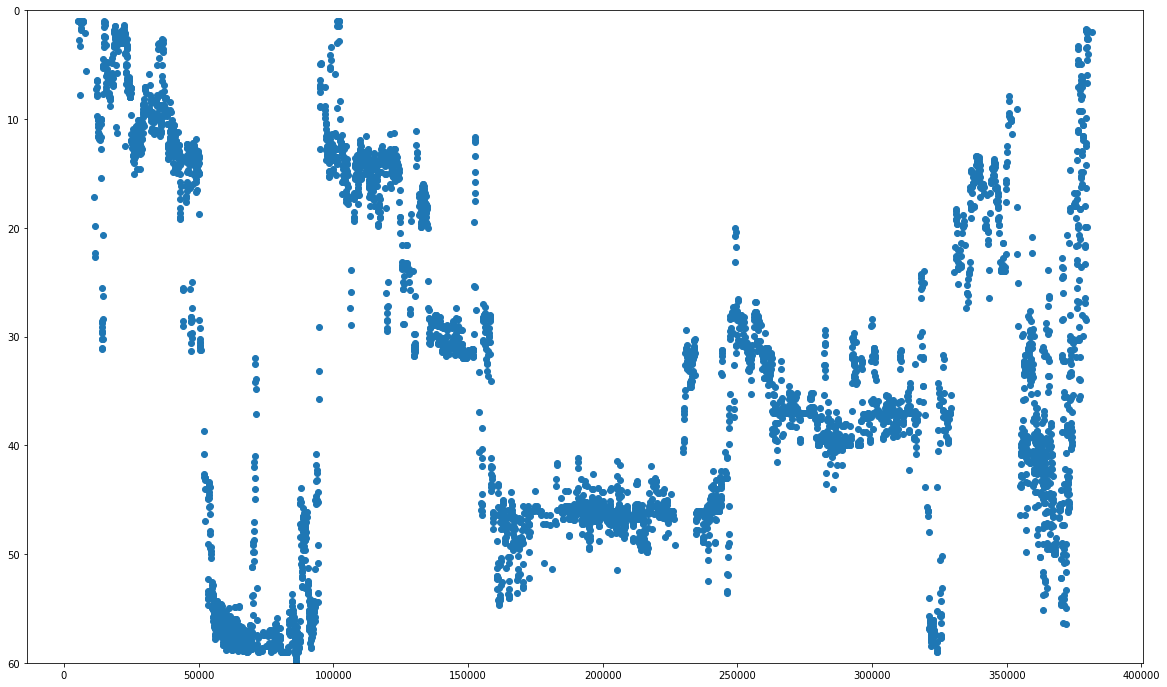

In [25]:
plot_data(filtered_data)

In [ ]:
if not os.path.exists("filter_plots"):
    os.mkdir("filter_plots")
for filter_len, filters in GAUSSIAN_KERNELS.items():
    for i, fil in enumerate(filters):
        foldername = "filter_plots/{}_{}".format(filter_len,i)
        if not os.path.exists(foldername):
            os.mkdir(foldername)
        foldername += "/"
        for file in os.listdir(BASE_DIR):
            try:
                data = readfile(file)
                data = filter_data(data)
                plot_data(data,foldername+"/"+file[:-5]+"_original.png")
                gaussian_data = apply_filter(data,fil,filter_len)
                plot_data(gaussian_data,foldername+"/"+file[:-5]+"_gaussian.png")
            except :
                print(file)

In [26]:
LAPLACIAN_FILTER = {5 : np.array([-1,-1,4,-1,-1])}

In [27]:
laplacian_data = apply_filter(filtered_data,LAPLACIAN_FILTER[5],5)

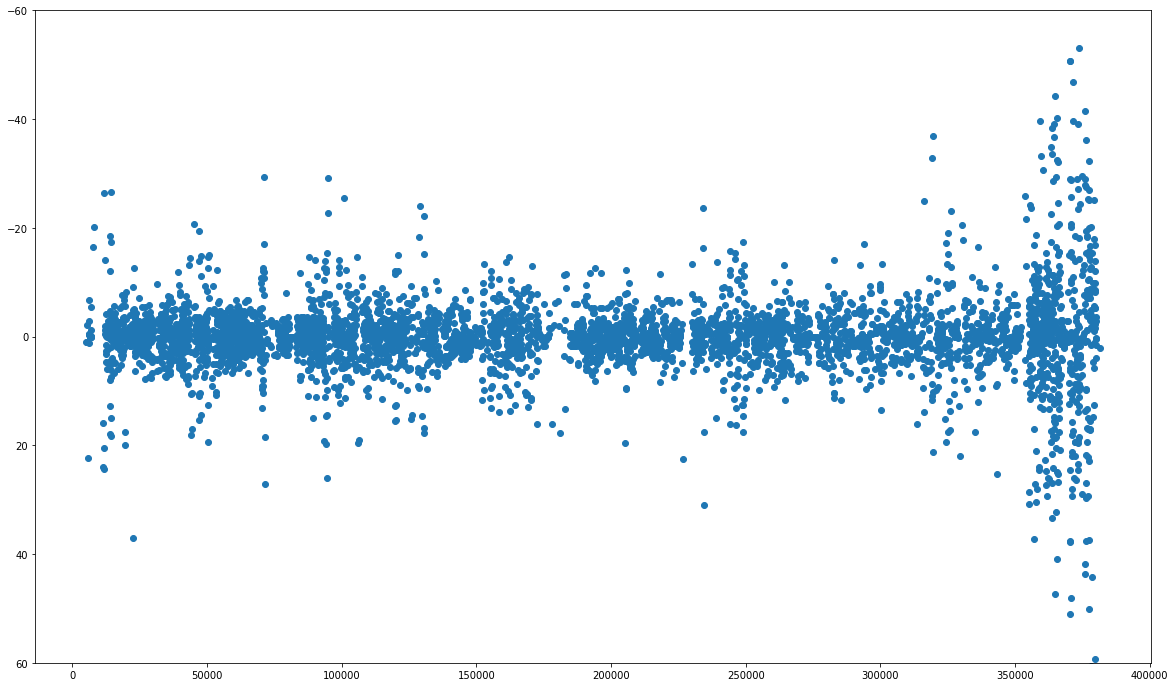

In [28]:
plot_data(laplacian_data,ylim_min=-60)

In [10]:
def conservative_smoothing(data,kernel_len):
    pd = int(kernel_len/2)
    ln = len(data)
    newdata = []
    for i in range(pd):
        newdata.append(data[i])
    for i in range(pd,ln - pd):
        #val = np.sum(data[i-pd:i+pd+1,0]*kernel)
        neighbors = data[i-pd:i,0]
        neighbors = np.concatenate((neighbors,data[i+1:i+1+pd,0]))
        if data[i,0] < np.min(neighbors):
            newdata.append((np.min(neighbors),data[i,1]))
        elif data[i,0] > np.max(neighbors):
            newdata.append((np.max(neighbors),data[i,1]))
        else:
            newdata.append((data[i,0],data[i,1]))
    for i in range(ln-pd,ln) :
        newdata.append(data[i])
    return np.array(newdata)

In [86]:
conservative_data = conservative_smoothing(data,5)

In [ ]:
if not os.path.exists("filter_plots"):
    os.mkdir("filter_plots")
for filter_len, filters in GAUSSIAN_KERNELS.items():
    for i, fil in enumerate(filters):
        foldername = "filter_plots/{}_{}".format(filter_len,i)
        if not os.path.exists(foldername):
            os.mkdir(foldername)
        foldername += "/"
        for file in os.listdir(BASE_DIR):
            try:
                data = readfile(file)
                data = filter_data(data)
                conservative_data = conservative_smoothing(data,5)
                plot_data(conservative_data,foldername+"/"+file[:-5]+"_conservative.png")
                gaussian_data = apply_filter(conservative_data,fil,filter_len)
                plot_data(gaussian_data,foldername+"/"+file[:-5]+"_conservative_gaussian.png")
            except :
                print(file)

In [ ]:
plot_data(data)

In [87]:
gaussian_conservative = apply_filter(conservative_data,GAUSSIAN_KERNELS[5][0],5)

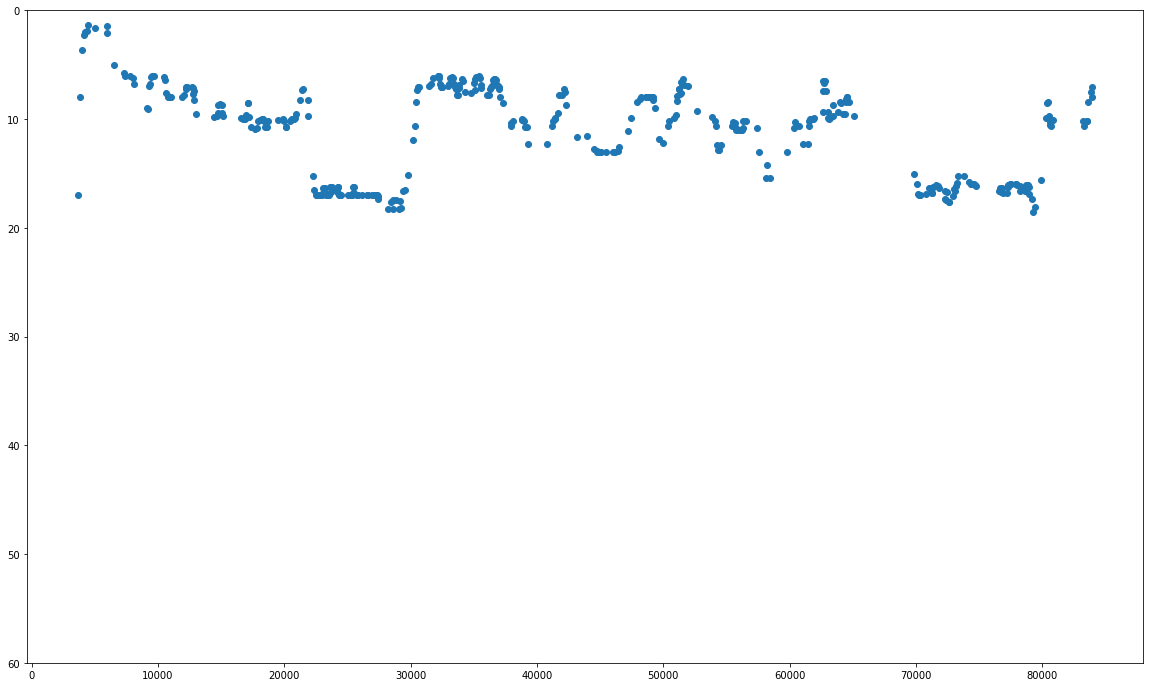

In [88]:
plot_data(gaussian_conservative)

In [11]:
FIRST_DERIVATIVE = {3 : [np.array([-1,0,1]),np.array([-2,0,-2])], 5 : [np.array([-1,-2,0,2,1])]}

In [89]:
first_der_5_g = apply_filter(gaussian_conservative,FIRST_DERIVATIVE[5][0],5)

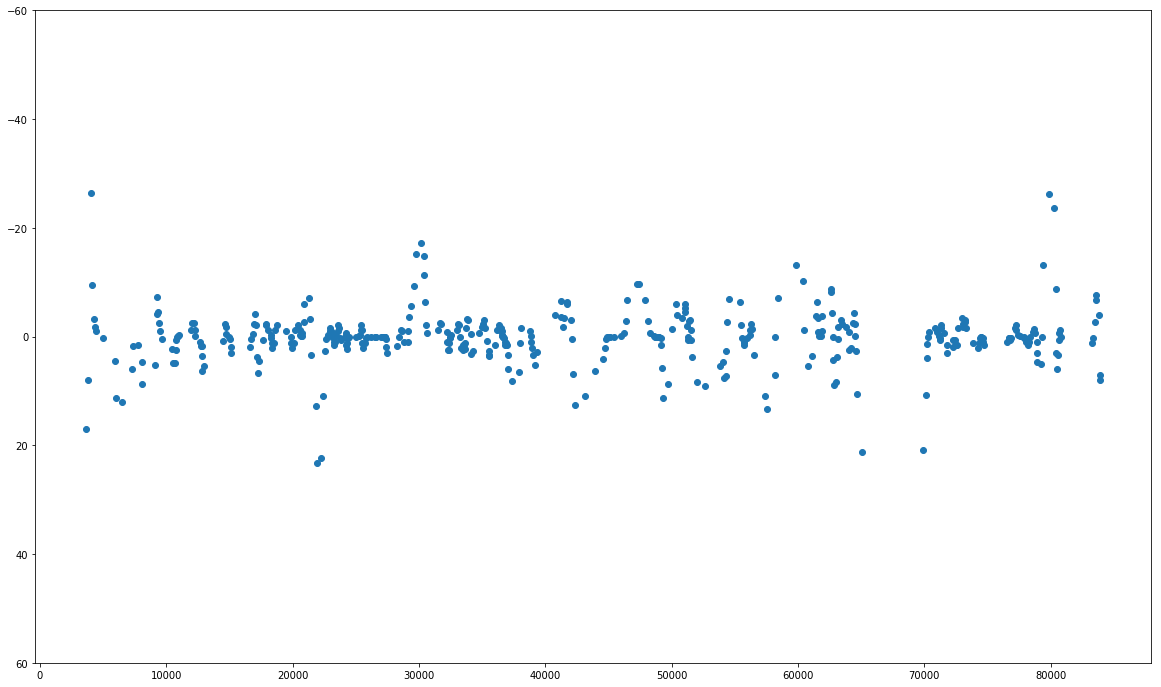

In [90]:
plot_data(first_der_5_g,ylim_min=-60)

In [10]:
if not os.path.exists("filter_plots"):
    os.mkdir("filter_plots")
for filter_len, filters in GAUSSIAN_KERNELS.items():
    for i, fil in enumerate(filters):
        foldername = "filter_plots/{}_{}".format(filter_len,i)
        if not os.path.exists(foldername):
            os.mkdir(foldername)
        foldername += "/"
        for file in os.listdir(BASE_DIR):
            try:
                data = readfile(file)
                data = filter_data(data)
                conservative_data = conservative_smoothing(data,5)
                gaussian_data = apply_filter(conservative_data,fil,filter_len)
                first_der_5_g = apply_filter(gaussian_data,FIRST_DERIVATIVE[5][0],5)
                second_der_5_g = apply_filter(first_der_5_g,FIRST_DERIVATIVE[5][0],5)
                plot_data(second_der_5_g,foldername+"/"+file[:-5]+"_conservative_gaussian_secondder.png",ylim_min=-60)
            except :
                print(file)

Harshit_5.xlsx


/home/ayush/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Niks_5.xlsx
deepesh_31_fm.xlsx
Arpit24.xlsx


In [56]:
'''
def derivative_wrt_time(data,kernel,kernel_len):
    pd = int(kernel_len/2)
    ln = len(data)
    newdata = []
    for i in range(pd):
        newdata.append((data[i,0]/data[i,1],data[i,1]))
    for i in range(pd,ln - pd):
        val = np.sum(data[i-pd:i+pd+1,0]*kernel)/np.sum(data[i-pd:i+pd+1,1]*kernel)
        newdata.append((val,data[i,1]))
    for i in range(ln-pd,ln) :
        newdata.append((data[i,0]/data[i,1],data[i,1]))
    return np.array(newdata)
der_time = derivative_wrt_time(gaussian_conservative,FIRST_DERIVATIVE[5][0],5)
der_time_log = np.array([(np.log(abs(x[0]))*(x[0]/abs(x[0])),x[1]) for x in der_time])
'''

In [69]:
'''
def plot_derivative(data,saveplace=None):
    plt.figure(figsize=(20,12))
    plt.scatter(data[:,1],data[:,0])
    plt.ylim(10,-10)
    if saveplace is not None:
        plt.savefig(saveplace)
    plt.show()
plot_derivative(der_time_log)
'''

In [20]:
second_der_5_g = apply_filter(first_der_5_g,FIRST_DERIVATIVE[5][0],5)

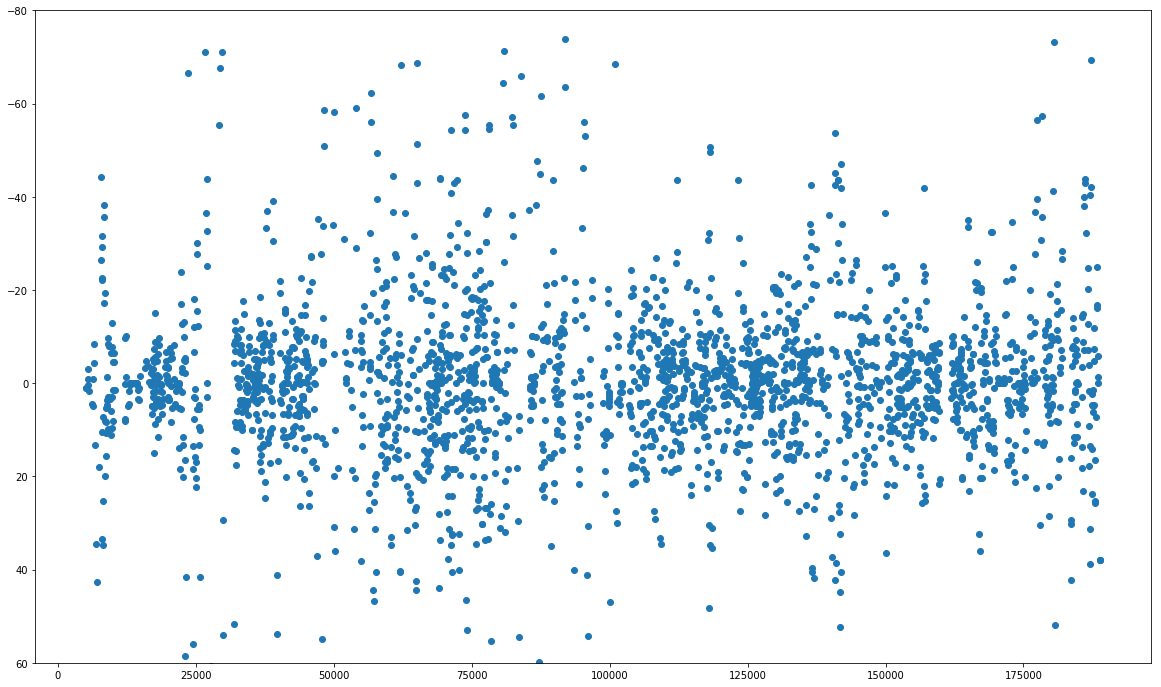

In [21]:
plot_data(second_der_5_g,ylim_min=-80)

In [1]:
import pandas as pd

In [12]:
if not os.path.exists("filter_plots"):
    os.mkdir("filter_plots")
for filter_len, filters in GAUSSIAN_KERNELS.items():
    for i, fil in enumerate(filters):
        foldername = "filter_plots/{}_{}".format(filter_len,i)
        if not os.path.exists(foldername):
            os.mkdir(foldername)
        foldername += "/"
        for file in os.listdir(BASE_DIR):
            try:
                data = readfile(file)
                data = filter_data(data)
                conservative_data = conservative_smoothing(data,5)
                gaussian_data = apply_filter(conservative_data,fil,filter_len)
                first_der_5_g = apply_filter(gaussian_data,FIRST_DERIVATIVE[5][0],5)
                
                df = pd.DataFrame (first_der_5_g)
                filepath = foldername+"/"+file[:-5]+"_conservative_gaussian_firstder.xlsx"
                df.to_excel(filepath, index=False)
            except :
                print(file)

Harshit_5.xlsx
Niks_5.xlsx
deepesh_31_fm.xlsx
Arpit24.xlsx


In [1]:
DERIVATIVE_THRESH = 10

In [ ]:
for file in os.listdir(BASE_DIR):
    